In [3]:
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.datasets import load_breast_cancer



cancer = load_breast_cancer()



x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 

                                                    stratify=cancer.target, random_state=0)



gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.3,max_depth=3) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)



score_train = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train))

# 1.000



score_test = gbc.score(x_test, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test))

# 0.958


1.000
0.937


In [4]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)

gbc.fit(x_train, y_train)



score_train_pre = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train_pre))

# 0.995



score_test_pre = gbc.score(x_test, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test_pre))

# 0.965

0.995
0.965


In [5]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train_lr = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train_lr))

# 0.995



score_test_lr = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test_lr))

# 0.944

0.995
0.944


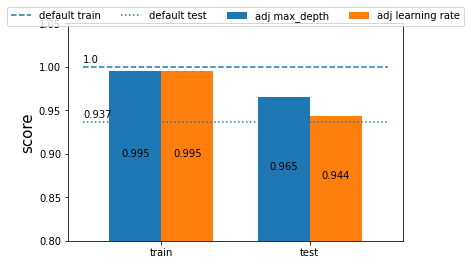

In [6]:
import matplotlib

import matplotlib.pyplot as plt

import numpy as np



score_set = np.round([score_train, score_test], 3)

max_depth_score_set = np.round([score_train_pre, score_test_pre], 3)

learning_rete_score_set = np.round([score_train_lr, score_test_lr], 3)



index = np.arange(len(score_set))

bar_width = 0.35

bottom = 0.8

list_set = [max_depth_score_set, learning_rete_score_set]

line_set = ['--', ':']

names = ['train', 'test']



for i, line_set, name in zip(index, line_set, names):

    plt.hlines(score_set[i], xmin=0-bar_width,

               xmax=index[-1]+2*bar_width,

               linestyle=line_set, label='default {}'.format(name))

    plt.text(0-bar_width, score_set[i]+0.005, str(score_set[i]))



plt.bar(index, max_depth_score_set, width=bar_width, label='adj max_depth')

plt.bar(index+bar_width, learning_rete_score_set, width=bar_width, label='adj learning rate')

for i, ts, te in zip(index, max_depth_score_set, learning_rete_score_set):

    plt.text(i, (bottom+ts)/2, str(ts), horizontalalignment='center')

    plt.text(i+bar_width, (bottom+te)/2, str(te), horizontalalignment='center')



plt.ylim(bottom, 1.05)

plt.xticks(index+bar_width/2, names)

plt.ylabel('score', size=15)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False)

plt.show()

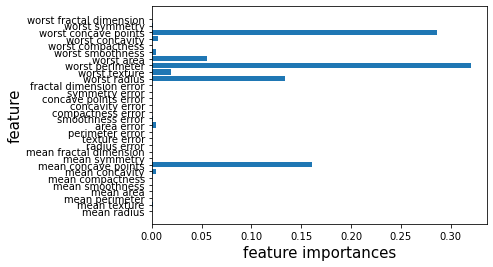

In [7]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(x_train, y_train)

n_feature = cancer.data.shape[1]

index=np.arange(n_feature)



plt.barh(index, gbc.feature_importances_, align='center')

plt.yticks(index, cancer.feature_names)

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 